1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [15]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):

            distance = e_metrics(x, x_train[i])

            test_distances.append((distance, y_train[i]))

        k_neighbours = sorted(test_distances)[0:k]

        classes = {class_item: 0 for class_item in set(y_train)}

        for d in k_neighbours:
            classes[d[1]] += 1

        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def knn_weights(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):

            distance = e_metrics(x, x_train[i])

            test_distances.append((distance, y_train[i]))
        
        k_neighbours = sorted(test_distances)[0:k]
        classes = {class_item: 0 for class_item in set(y_train)}

        for d in k_neighbours:
            classes[d[1]] += 0.9 ** d[0]

        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [7]:
cmap = ListedColormap(['red', 'green', 'blue'])
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z_weights = knn_weights(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

    Z_weights = np.array(Z_weights).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z_weights, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация с весами при k = {k}")
    plt.show()

Точность алгоритма при k = 3: 0.733
Точность алгоритма с весами при k = 3: 0.733


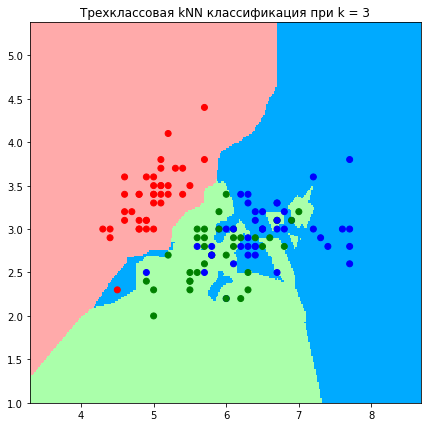

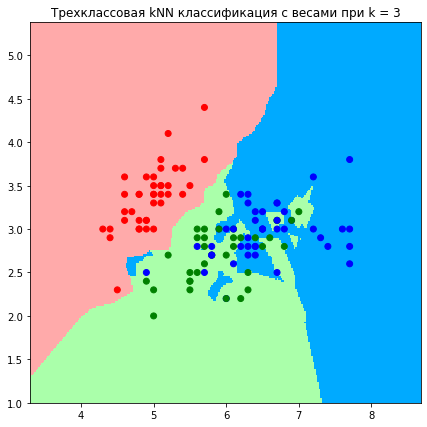

In [23]:
k = 3
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_weights = knn_weights(X_train, y_train, X_test, k)
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 5: 0.867
Точность алгоритма с весами при k = 5: 0.867


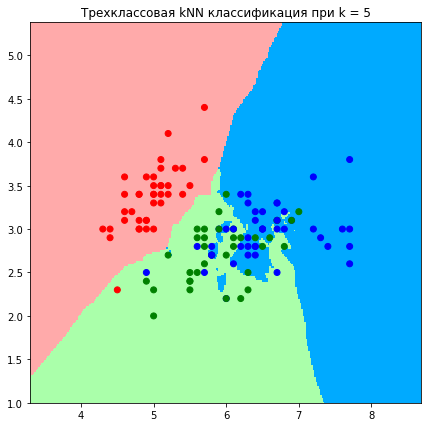

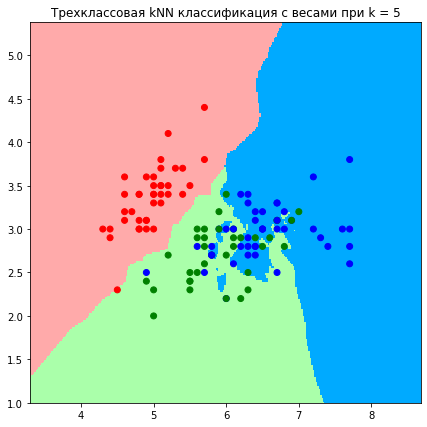

In [24]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_weights = knn_weights(X_train, y_train, X_test, k)
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 7: 0.800
Точность алгоритма с весами при k = 7: 0.800


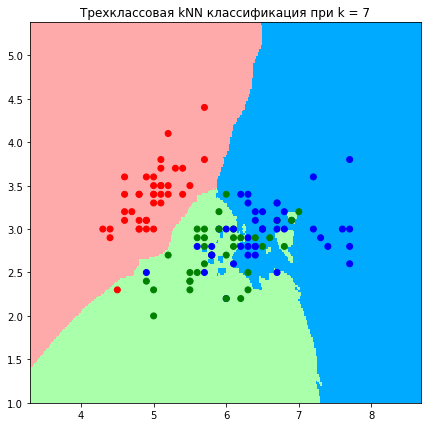

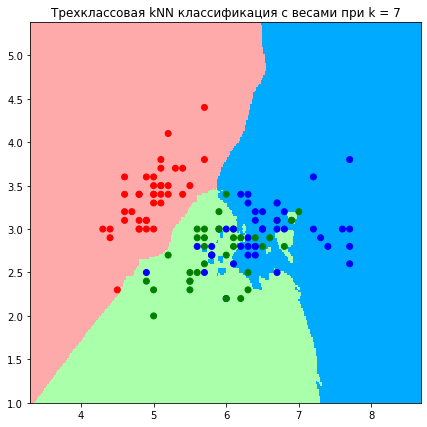

In [25]:
k = 7
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_weights = knn_weights(X_train, y_train, X_test, k)
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 10: 0.833
Точность алгоритма с весами при k = 10: 0.867


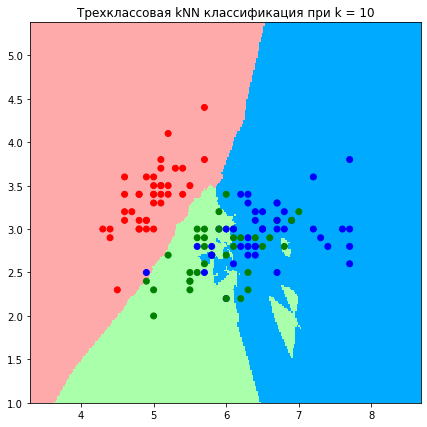

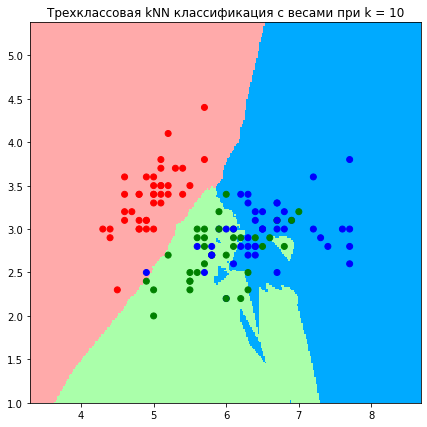

In [26]:
k = 10
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_weights = knn_weights(X_train, y_train, X_test, k)
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 20: 0.833
Точность алгоритма с весами при k = 20: 0.833


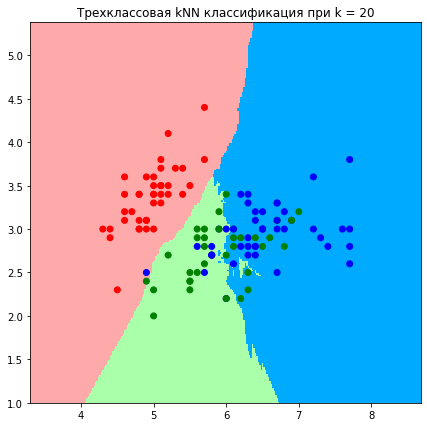

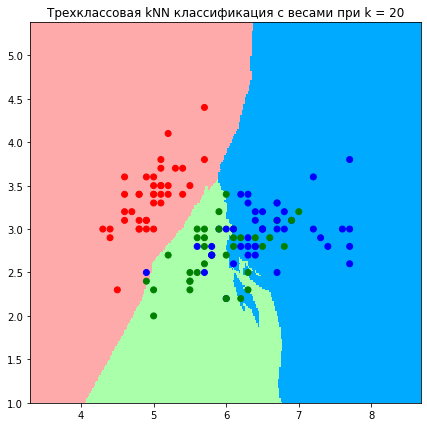

In [27]:
k = 20
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_weights = knn_weights(X_train, y_train, X_test, k)
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 30: 0.833
Точность алгоритма с весами при k = 30: 0.833


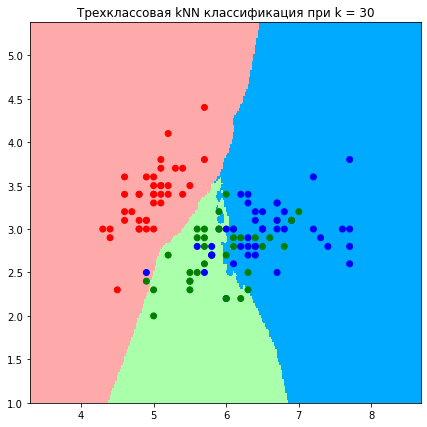

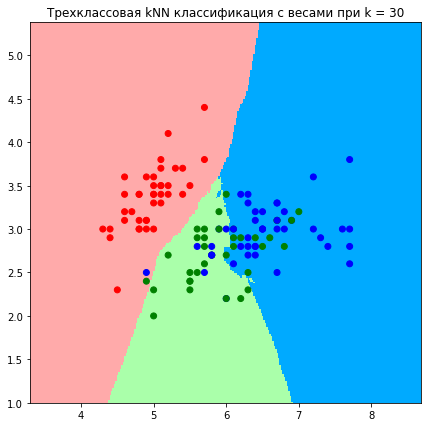

In [28]:
k = 30
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_weights = knn_weights(X_train, y_train, X_test, k)
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 50: 0.733
Точность алгоритма с весами при k = 50: 0.733


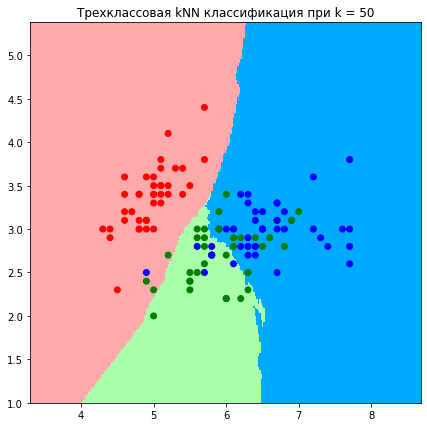

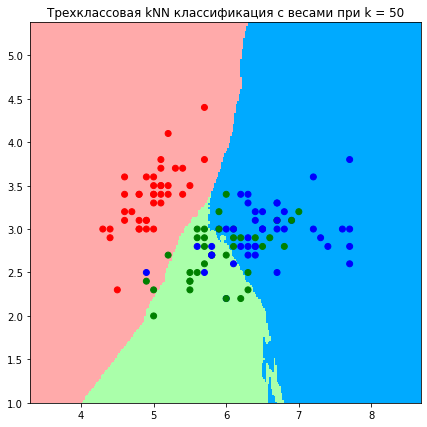

In [29]:
k = 50
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_weights = knn_weights(X_train, y_train, X_test, k)
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')
get_graph(X_train, y_train, k)

Алгорит с весами показывает чуть лучшую точности при k = 10 